In [1]:
import os
import math

import pandas as pd
from numpy import arange, mean, std
from sklearn import preprocessing
import numpy as np

import json

In [2]:
# import csv
df = pd.read_csv("C:\\Users\\giuli\\Desktop\\new ds\\merged\\mergedFile.csv")
df
# print(df.describe())

,AxMean,AxMed,AxStd,AxVar,AxMax,AxMin,AyMean,AyMed,AyStd,AyVar,...,PreMean,PreMed,PreStd,PreVar,PreMax,PreMin,View,User,Hand,Smartphone
0,-0.955980,-1.098000,0.909562,0.827302,0.271050,-2.202000,2.796702,2.635050,0.343638,0.118087,...,1.0,1.0,0.0,0.0,1.0,1.0,w,Biagio,RIGHT,REALME 7
1,0.582750,0.504000,0.497610,0.247616,1.228950,-0.115950,1.239209,1.243950,0.195806,0.038340,...,1.0,1.0,0.0,0.0,1.0,1.0,h,Biagio,RIGHT,REALME 7
2,-1.665956,-1.339950,0.780396,0.609017,-0.553950,-2.503950,2.015613,2.050950,0.320559,0.102758,...,1.0,1.0,0.0,0.0,1.0,1.0,a,Biagio,RIGHT,REALME 7
3,-0.068662,-0.181500,0.477223,0.227742,0.640050,-0.667050,1.617863,1.508550,0.337742,0.114069,...,1.0,1.0,0.0,0.0,1.0,1.0,t,Biagio,RIGHT,REALME 7
4,0.099825,0.120000,0.297081,0.088257,0.504000,-0.463050,1.194500,1.156500,0.209884,0.044051,...,1.0,1.0,0.0,0.0,1.0,1.0,,Biagio,RIGHT,REALME 7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25620,-1.753162,-1.707077,0.092171,0.008495,-1.707077,-1.891418,1.075600,1.108521,0.065842,0.004335,...,1.0,1.0,0.0,0.0,1.0,1.0,a,Giulio,RIGHT,ASUS ZENFONE 3
25621,1.156399,1.051056,0.210686,0.044388,1.472427,1.051056,0.071224,0.093369,0.044289,0.001961,...,1.0,1.0,0.0,0.0,1.0,1.0,l,Giulio,RIGHT,ASUS ZENFONE 3
25622,-0.220276,-0.220276,0.000000,0.000000,-0.220276,-0.220276,0.876282,0.876282,0.000000,0.000000,...,1.0,1.0,0.0,0.0,1.0,1.0,i,Giulio,RIGHT,ASUS ZENFONE 3
25623,-0.143650,-0.095764,0.095772,0.009172,-0.095764,-0.287308,0.764942,0.735016,0.059853,0.003582,...,1.0,1.0,0.0,0.0,1.0,1.0,t,Giulio,RIGHT,ASUS ZENFONE 3


In [3]:
# Normalization between -1 and 1
df_norm = df.copy()

notnorm = ['View','User', 'Hand', 'Smartphone']
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

for col in list(df_norm.columns):
    if col in notnorm:
        continue
    x = df_norm[[col]].values.astype(float) # cast to float
    x_scaled = min_max_scaler.fit_transform(x) # fit data and transform it
    df_norm[[col]] = x_scaled

In [4]:
df_norm.describe()
df = df_norm
df

,AxMean,AxMed,AxStd,AxVar,AxMax,AxMin,AyMean,AyMed,AyStd,AyVar,...,PreMean,PreMed,PreStd,PreVar,PreMax,PreMin,View,User,Hand,Smartphone
0,0.035564,0.050492,-0.246425,-0.716062,0.127137,-0.053982,-0.030285,-0.040270,-0.422755,-0.833394,...,1.0,1.0,-1.0,-1.0,1.0,1.0,w,Biagio,RIGHT,REALME 7
1,0.418963,0.425894,-0.587728,-0.915016,0.347631,0.426174,-0.401803,-0.365685,-0.671085,-0.945907,...,1.0,1.0,-1.0,-1.0,1.0,1.0,h,Biagio,RIGHT,REALME 7
2,-0.141338,-0.006206,-0.353439,-0.790980,-0.062766,-0.123483,-0.216603,-0.176906,-0.461523,-0.855021,...,1.0,1.0,-1.0,-1.0,1.0,1.0,a,Biagio,RIGHT,REALME 7
3,0.256653,0.265258,-0.604619,-0.921837,0.212075,0.299325,-0.311481,-0.303788,-0.432660,-0.839063,...,1.0,1.0,-1.0,-1.0,1.0,1.0,t,Biagio,RIGHT,REALME 7
4,0.298634,0.335910,-0.753867,-0.969709,0.180758,0.346281,-0.412468,-0.386142,-0.647436,-0.937849,...,1.0,1.0,-1.0,-1.0,1.0,1.0,,Biagio,RIGHT,REALME 7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25620,-0.163067,-0.092236,-0.923636,-0.997084,-0.328200,0.017506,-0.440830,-0.397365,-0.889399,-0.993884,...,1.0,1.0,-1.0,-1.0,1.0,1.0,a,Giulio,RIGHT,ASUS ZENFONE 3
25621,0.561896,0.554088,-0.825446,-0.984765,0.403676,0.694790,-0.680409,-0.634836,-0.925604,-0.997233,...,1.0,1.0,-1.0,-1.0,1.0,1.0,l,Giulio,RIGHT,ASUS ZENFONE 3
25622,0.218876,0.256172,-1.000000,-1.000000,0.014041,0.402161,-0.488374,-0.451692,-1.000000,-1.000000,...,1.0,1.0,-1.0,-1.0,1.0,1.0,i,Giulio,RIGHT,ASUS ZENFONE 3
25623,0.237969,0.285349,-0.920653,-0.996852,0.042701,0.386732,-0.514933,-0.484738,-0.899459,-0.994946,...,1.0,1.0,-1.0,-1.0,1.0,1.0,t,Giulio,RIGHT,ASUS ZENFONE 3


In [5]:
# add letters
letters = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"," "]
# add distances from left margin (xAxis) and top margin (yAxis) (start from 1)
yAxis = [ 1,  2,  2,  1,  0,  1,  1,  1,  0,  1,  1,  1,  2,  2,  0,  0,  0,  0,  1,  0,  0,  2,  0,  2,  0,  2, 3]
xAxis =[ 1.5,  6,  4,  3.5,  3,  4.5,  5.5, 6.5,  8,  7.5, 8.5,  9.5,  8,  7,  9,  10,  1,  4,  2.5,  5,  7,  5,  2,  3,  6,  2, 5]

# pair of distances for letters
dict_letters = {}
for i, let in enumerate(letters):
    dict_letters[let] = (xAxis[i], yAxis[i])

center = "a"
dict_dist = {}
for let in letters:
    dict_dist[let] = math.sqrt((dict_letters[center][0] - dict_letters[let][0])**2 + (dict_letters[center][1] - dict_letters[let][1])**2)

# write in df distances and dist from center
df.loc[:,'x'] = df.apply(lambda x: dict_letters[x['View']][0], axis=1)
df.loc[:,'y'] = df.apply(lambda x: dict_letters[x['View']][1], axis=1)
df.loc[:,'dist'] = df.apply(lambda x: dict_dist[x['View']], axis=1)
df

,AxMean,AxMed,AxStd,AxVar,AxMax,AxMin,AyMean,AyMed,AyStd,AyVar,...,PreVar,PreMax,PreMin,View,User,Hand,Smartphone,x,y,dist
0,0.035564,0.050492,-0.246425,-0.716062,0.127137,-0.053982,-0.030285,-0.040270,-0.422755,-0.833394,...,-1.0,1.0,1.0,w,Biagio,RIGHT,REALME 7,2.0,0,1.118034
1,0.418963,0.425894,-0.587728,-0.915016,0.347631,0.426174,-0.401803,-0.365685,-0.671085,-0.945907,...,-1.0,1.0,1.0,h,Biagio,RIGHT,REALME 7,6.5,1,5.000000
2,-0.141338,-0.006206,-0.353439,-0.790980,-0.062766,-0.123483,-0.216603,-0.176906,-0.461523,-0.855021,...,-1.0,1.0,1.0,a,Biagio,RIGHT,REALME 7,1.5,1,0.000000
3,0.256653,0.265258,-0.604619,-0.921837,0.212075,0.299325,-0.311481,-0.303788,-0.432660,-0.839063,...,-1.0,1.0,1.0,t,Biagio,RIGHT,REALME 7,5.0,0,3.640055
4,0.298634,0.335910,-0.753867,-0.969709,0.180758,0.346281,-0.412468,-0.386142,-0.647436,-0.937849,...,-1.0,1.0,1.0,,Biagio,RIGHT,REALME 7,5.0,3,4.031129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25620,-0.163067,-0.092236,-0.923636,-0.997084,-0.328200,0.017506,-0.440830,-0.397365,-0.889399,-0.993884,...,-1.0,1.0,1.0,a,Giulio,RIGHT,ASUS ZENFONE 3,1.5,1,0.000000
25621,0.561896,0.554088,-0.825446,-0.984765,0.403676,0.694790,-0.680409,-0.634836,-0.925604,-0.997233,...,-1.0,1.0,1.0,l,Giulio,RIGHT,ASUS ZENFONE 3,9.5,1,8.000000
25622,0.218876,0.256172,-1.000000,-1.000000,0.014041,0.402161,-0.488374,-0.451692,-1.000000,-1.000000,...,-1.0,1.0,1.0,i,Giulio,RIGHT,ASUS ZENFONE 3,8.0,0,6.576473
25623,0.237969,0.285349,-0.920653,-0.996852,0.042701,0.386732,-0.514933,-0.484738,-0.899459,-0.994946,...,-1.0,1.0,1.0,t,Giulio,RIGHT,ASUS ZENFONE 3,5.0,0,3.640055


In [6]:
# Group dataset by letter/distance

# mean = mean of the rows with the same View and distances
df_mean = df.groupby(['View','dist','x','y'], as_index=False).agg('mean')
df_mean

,View,dist,x,y,AxMean,AxMed,AxStd,AxVar,AxMax,AxMin,...,GrPitchStd,GrPitchVar,GrPitchMax,GrPitchMin,PreMean,PreMed,PreStd,PreVar,PreMax,PreMin
0,,4.031129,5.0,3,0.263204,0.296761,-0.746812,-0.953980,0.153360,0.343680,...,-0.774955,-0.954829,-0.167063,-0.119677,0.344867,0.344867,-1.0,-1.0,0.344867,0.344867
1,a,0.000000,1.5,1,-0.158803,-0.102414,-0.562209,-0.852578,-0.165842,-0.113848,...,-0.673249,-0.907875,0.282449,0.283081,0.374189,0.374189,-1.0,-1.0,0.374189,0.374189
2,b,4.609772,6.0,2,0.259733,0.294619,-0.751112,-0.953407,0.142498,0.344963,...,-0.827397,-0.969894,-0.172722,-0.112642,0.331312,0.331312,-1.0,-1.0,0.331312,0.331312
3,c,2.692582,4.0,2,0.176625,0.217678,-0.701008,-0.926940,0.089153,0.239879,...,-0.789811,-0.959105,-0.081256,-0.038746,0.361868,0.361868,-1.0,-1.0,0.361868,0.361868
4,d,2.000000,3.5,1,0.066985,0.114844,-0.686925,-0.921824,-0.008257,0.134961,...,-0.754170,-0.944572,0.036505,0.063000,0.371255,0.371255,-1.0,-1.0,0.371255,0.371255
5,e,1.802776,3.0,0,-0.023094,0.028453,-0.655597,-0.903264,-0.083387,0.042347,...,-0.721175,-0.929613,0.131097,0.146652,0.342579,0.342579,-1.0,-1.0,0.342579,0.342579
6,f,3.000000,4.5,1,0.108786,0.152744,-0.727190,-0.938727,0.012964,0.192386,...,-0.774333,-0.950961,-0.018478,0.018350,0.351042,0.351042,-1.0,-1.0,0.351042,0.351042
7,g,4.000000,5.5,1,0.147901,0.191665,-0.720540,-0.940661,0.052033,0.223479,...,-0.791777,-0.958728,-0.042781,0.000280,0.374867,0.374867,-1.0,-1.0,0.374867,0.374867
8,h,5.000000,6.5,1,0.241819,0.277230,-0.748850,-0.951136,0.126884,0.324900,...,-0.816898,-0.968289,-0.146433,-0.090606,0.378174,0.378174,-1.0,-1.0,0.378174,0.378174
9,i,6.576473,8.0,0,0.255855,0.290744,-0.740584,-0.949152,0.147189,0.335956,...,-0.816679,-0.967333,-0.174606,-0.119239,0.362228,0.362228,-1.0,-1.0,0.362228,0.362228


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# PREPARE A DATAFRAME FOR HEATMAPS: MULTIPLY SPACES TO SHOW MULTIPLE BLOCKS

df_heat = df_mean.copy()

# Duplicate spaces
space_x = df_heat['x'][0]
row = df_heat.iloc[[0],]
SPACEBAR_LEN = 9
BLOCK_SIZE = 0.5
for i in range(SPACEBAR_LEN):
    new_block = space_x - (SPACEBAR_LEN - 1) / 2 * BLOCK_SIZE + i * BLOCK_SIZE
    print(space_x, new_block)
    if new_block == space_x:
        continue

    # append the other rows for spacebar draw
    df_heat = df_heat.append(df_heat.loc[[0] * 1].assign(**{'x': new_block}), ignore_index=True) # 1 is the number of repeats

df_heat

5.0 3.0
5.0 3.5
5.0 4.0
5.0 4.5
5.0 5.0
5.0 5.5
5.0 6.0
5.0 6.5
5.0 7.0


,View,dist,x,y,AxMean,AxMed,AxStd,AxVar,AxMax,AxMin,...,GrPitchStd,GrPitchVar,GrPitchMax,GrPitchMin,PreMean,PreMed,PreStd,PreVar,PreMax,PreMin
0,,4.031129,5.0,3,0.263204,0.296761,-0.746812,-0.953980,0.153360,0.343680,...,-0.774955,-0.954829,-0.167063,-0.119677,0.344867,0.344867,-1.0,-1.0,0.344867,0.344867
1,a,0.000000,1.5,1,-0.158803,-0.102414,-0.562209,-0.852578,-0.165842,-0.113848,...,-0.673249,-0.907875,0.282449,0.283081,0.374189,0.374189,-1.0,-1.0,0.374189,0.374189
2,b,4.609772,6.0,2,0.259733,0.294619,-0.751112,-0.953407,0.142498,0.344963,...,-0.827397,-0.969894,-0.172722,-0.112642,0.331312,0.331312,-1.0,-1.0,0.331312,0.331312
3,c,2.692582,4.0,2,0.176625,0.217678,-0.701008,-0.926940,0.089153,0.239879,...,-0.789811,-0.959105,-0.081256,-0.038746,0.361868,0.361868,-1.0,-1.0,0.361868,0.361868
4,d,2.000000,3.5,1,0.066985,0.114844,-0.686925,-0.921824,-0.008257,0.134961,...,-0.754170,-0.944572,0.036505,0.063000,0.371255,0.371255,-1.0,-1.0,0.371255,0.371255
5,e,1.802776,3.0,0,-0.023094,0.028453,-0.655597,-0.903264,-0.083387,0.042347,...,-0.721175,-0.929613,0.131097,0.146652,0.342579,0.342579,-1.0,-1.0,0.342579,0.342579
6,f,3.000000,4.5,1,0.108786,0.152744,-0.727190,-0.938727,0.012964,0.192386,...,-0.774333,-0.950961,-0.018478,0.018350,0.351042,0.351042,-1.0,-1.0,0.351042,0.351042
7,g,4.000000,5.5,1,0.147901,0.191665,-0.720540,-0.940661,0.052033,0.223479,...,-0.791777,-0.958728,-0.042781,0.000280,0.374867,0.374867,-1.0,-1.0,0.374867,0.374867
8,h,5.000000,6.5,1,0.241819,0.277230,-0.748850,-0.951136,0.126884,0.324900,...,-0.816898,-0.968289,-0.146433,-0.090606,0.378174,0.378174,-1.0,-1.0,0.378174,0.378174
9,i,6.576473,8.0,0,0.255855,0.290744,-0.740584,-0.949152,0.147189,0.335956,...,-0.816679,-0.967333,-0.174606,-0.119239,0.362228,0.362228,-1.0,-1.0,0.362228,0.362228


<AxesSubplot:title={'center':'Title'}, xlabel='x', ylabel='y'>

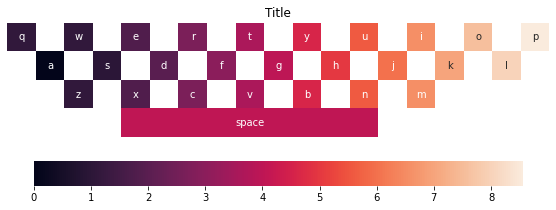

In [9]:
#HEATMAP - INTERACTIVE

labz = [
    ['q','','w','','e','','r','','t','','y','','u','','i','','o','','p'],
    ['','a','','s','','d','','f','','g','','h','','j','','k','','l',''],
    ['','','z','','x','','c','','v','','b','','n','','m','','','',''],
    ['','','','','','','','','space','','','','','','','','','','']
]

# in pivot: 'y' is the index of rows, 'x' index of columns and 'dist' the value
_ = df_heat.pivot('y', 'x', 'dist') # <--- Change here 'dist' to the column you want
plt.figure(figsize=(10,3))
plt.axis('off')
plt.title("Title")
sns.heatmap(_, annot=labz, fmt='', square=True, cbar_kws = dict(use_gridspec=False,location="bottom"))


In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from numpy import unique
from numpy import where

In [11]:
# X_prova = df
# X_prova = X_prova.loc[X_prova['View'] == 'a']
#
# X_prova = X_prova.mean(axis=0)
# X_prova

In [11]:
df_kmeans = df.drop(['User','Hand', 'Smartphone'], axis=1)

df_kmeans = df_kmeans.groupby(['View', 'x', 'y','dist'], as_index=False).agg('mean')

col_heat = df_kmeans[['View', 'x', 'y','dist']]

df_kmeans = df_kmeans.drop(['View', 'x', 'y','dist'], axis=1)

col_heat

,View,x,y,dist
0,,5.0,3,4.031129
1,a,1.5,1,0.000000
2,b,6.0,2,4.609772
3,c,4.0,2,2.692582
4,d,3.5,1,2.000000
5,e,3.0,0,1.802776
6,f,4.5,1,3.000000
7,g,5.5,1,4.000000
8,h,6.5,1,5.000000
9,i,8.0,0,6.576473


In [12]:
clusters = []
test = []

for k in range(1, 28):

    model_kmeans = KMeans(n_clusters=k)
    # fit the model
    model_kmeans.fit(df_kmeans)
    train_labels = model_kmeans.labels_
    # assign a cluster to each example
    test_labels = model_kmeans.predict(df_kmeans)

    df_kmeans[str(k) + '_clusters'] = test_labels
    col_heat[str(k) + '_clusters'] = test_labels

    test.append(test_labels)

    # retrieve unique clusters
    cluster = unique(test_labels)
    clusters.append(cluster)



col_heat.to_csv(r'C:\Users\giuli\Desktop\col_heat.csv', index = False, header=True)

df_kmeans

,AxMean,AxMed,AxStd,AxVar,AxMax,AxMin,AyMean,AyMed,AyStd,AyVar,...,18_clusters,19_clusters,20_clusters,21_clusters,22_clusters,23_clusters,24_clusters,25_clusters,26_clusters,27_clusters
0,0.263204,0.296761,-0.746812,-0.953980,0.153360,0.343680,-0.507447,-0.466096,-0.555879,-0.866969,...,0,15,17,15,9,10,4,20,4,17
1,-0.158803,-0.102414,-0.562209,-0.852578,-0.165842,-0.113848,-0.234660,-0.202731,-0.603997,-0.869020,...,3,11,9,6,1,1,9,8,25,25
2,0.259733,0.294619,-0.751112,-0.953407,0.142498,0.344963,-0.506305,-0.466443,-0.580694,-0.877838,...,9,6,19,19,2,8,12,13,15,1
3,0.176625,0.217678,-0.701008,-0.926940,0.089153,0.239879,-0.404577,-0.365525,-0.625791,-0.899569,...,6,8,3,1,8,6,22,22,20,11
4,0.066985,0.114844,-0.686925,-0.921824,-0.008257,0.134961,-0.348168,-0.311645,-0.650226,-0.905596,...,1,9,1,4,4,9,2,0,5,0
5,-0.023094,0.028453,-0.655597,-0.903264,-0.083387,0.042347,-0.296238,-0.262081,-0.631631,-0.881300,...,7,1,0,8,10,3,18,17,3,14
6,0.108786,0.152744,-0.727190,-0.938727,0.012964,0.192386,-0.396401,-0.358659,-0.640366,-0.900159,...,2,2,16,3,16,15,0,12,0,5
7,0.147901,0.191665,-0.720540,-0.940661,0.052033,0.223479,-0.398625,-0.360468,-0.649557,-0.911469,...,6,8,3,1,8,22,11,10,13,8
8,0.241819,0.277230,-0.748850,-0.951136,0.126884,0.324900,-0.465565,-0.426631,-0.629509,-0.897018,...,8,16,5,5,5,7,7,9,6,23
9,0.255855,0.290744,-0.740584,-0.949152,0.147189,0.335956,-0.465007,-0.425490,-0.595868,-0.885682,...,8,16,5,5,5,7,7,24,24,2


In [13]:
df_kmeans.index = col_heat.index

df_kmeans[['View', 'x', 'y', 'dist']] = col_heat[['View', 'x', 'y', 'dist']]

# df_kmeans

In [14]:
SPACEBAR_LEN = 9
BLOCK_SIZE = 0.5
space_x_k = col_heat['x'][0]

for i in range(SPACEBAR_LEN):
    new_block_k = space_x_k - (SPACEBAR_LEN - 1) / 2 * BLOCK_SIZE + i * BLOCK_SIZE
    print(space_x_k, new_block_k)
    if new_block_k == space_x_k:
        continue

    # append the other rows for spacebar draw
    col_heat = col_heat.append(col_heat.loc[[0] * 1].assign(**{'x': new_block_k}), ignore_index=True)

col_heat

5.0 3.0
5.0 3.5
5.0 4.0
5.0 4.5
5.0 5.0
5.0 5.5
5.0 6.0
5.0 6.5
5.0 7.0


,View,x,y,dist,1_clusters,2_clusters,3_clusters,4_clusters,5_clusters,6_clusters,...,18_clusters,19_clusters,20_clusters,21_clusters,22_clusters,23_clusters,24_clusters,25_clusters,26_clusters,27_clusters
0,,5.0,3,4.031129,0,0,1,0,0,2,...,0,15,17,15,9,10,4,20,4,17
1,a,1.5,1,0.000000,0,1,2,2,3,4,...,3,11,9,6,1,1,9,8,25,25
2,b,6.0,2,4.609772,0,0,1,0,0,2,...,9,6,19,19,2,8,12,13,15,1
3,c,4.0,2,2.692582,0,0,1,3,1,5,...,6,8,3,1,8,6,22,22,20,11
4,d,3.5,1,2.000000,0,1,0,1,2,0,...,1,9,1,4,4,9,2,0,5,0
5,e,3.0,0,1.802776,0,1,0,1,2,0,...,7,1,0,8,10,3,18,17,3,14
6,f,4.5,1,3.000000,0,0,0,3,1,3,...,2,2,16,3,16,15,0,12,0,5
7,g,5.5,1,4.000000,0,0,1,3,1,5,...,6,8,3,1,8,22,11,10,13,8
8,h,6.5,1,5.000000,0,0,1,0,0,2,...,8,16,5,5,5,7,7,9,6,23
9,i,8.0,0,6.576473,0,0,1,0,0,2,...,8,16,5,5,5,7,7,24,24,2


In [15]:
# Create heatmap of KMeans

take_out = ['x', 'y', 'dist', 'View']

for col in col_heat.columns:
    if col in take_out:
        continue
    name_split = col.split("_")
    n_cluster = int(name_split[0])
    _ = col_heat.pivot('y', 'x', col) # col takes all values of letters
    plt.figure(figsize=(24,14))
    plt.axis('off')
    plt.title("Heatmap: " + col)
    sns.heatmap(_, annot=labz, fmt='', square=True, cbar_kws = dict(use_gridspec=False, location="bottom", ticks=range(0, n_cluster+1)))
    plt.savefig("C:\\Users\\giuli\\Desktop\\cluster_new_ds\\" + col + "_heat.png", bbox_inches='tight')
    plt.close()

In [16]:
# df = pd.merge(df, col_heat, how="left", on=["View"])
col_heat_base = col_heat

col_heat_base = col_heat_base.iloc[:-8, :] #remove rows for creation of spacebar
col_heat_base = col_heat_base.drop(['x', 'y','dist'], axis=1)
col_heat_base.to_csv(r'C:\Users\giuli\Desktop\col_heat_base.csv', index = False, header=True)
col_heat_base

,View,1_clusters,2_clusters,3_clusters,4_clusters,5_clusters,6_clusters,7_clusters,8_clusters,9_clusters,...,18_clusters,19_clusters,20_clusters,21_clusters,22_clusters,23_clusters,24_clusters,25_clusters,26_clusters,27_clusters
0,,0,0,1,0,0,2,2,7,5,...,0,15,17,15,9,10,4,20,4,17
1,a,0,1,2,2,3,4,4,5,2,...,3,11,9,6,1,1,9,8,25,25
2,b,0,0,1,0,0,2,2,0,3,...,9,6,19,19,2,8,12,13,15,1
3,c,0,0,1,3,1,5,1,4,6,...,6,8,3,1,8,6,22,22,20,11
4,d,0,1,0,1,2,0,0,3,1,...,1,9,1,4,4,9,2,0,5,0
5,e,0,1,0,1,2,0,0,3,8,...,7,1,0,8,10,3,18,17,3,14
6,f,0,0,0,3,1,3,5,1,0,...,2,2,16,3,16,15,0,12,0,5
7,g,0,0,1,3,1,5,1,4,6,...,6,8,3,1,8,22,11,10,13,8
8,h,0,0,1,0,0,2,2,0,3,...,8,16,5,5,5,7,7,9,6,23
9,i,0,0,1,0,0,2,2,0,3,...,8,16,5,5,5,7,7,24,24,2


In [17]:
dict_col_heat_base = {}

dict_col_heat_base['View'] = col_heat_base['View'].tolist()
for i in range(1, 28):
    dict_col_heat_base[str(i) + '_clusters'] = col_heat_base[str(i) + '_clusters'].tolist()

path_col_heat_base = 'C:\\Users\\giuli\\Desktop\\PythonTesi\\jsonFile\\col_heat_base.json'

# Creat json and save to file
json_col_heat_base = json.dumps(dict_col_heat_base, indent=4)
with open(path_col_heat_base, 'w') as file:
    file.write(json_col_heat_base)

In [18]:
#aggiunge al df le colonne dei cluster

df_clus = df

df_clus = pd.merge(df_clus, col_heat_base, how="left", on=["View"])

df_clus.to_csv(r'C:\Users\giuli\Desktop\df_clus.csv', index = False, header=True)

# df = df_clus
#
# df

df_clus

,AxMean,AxMed,AxStd,AxVar,AxMax,AxMin,AyMean,AyMed,AyStd,AyVar,...,18_clusters,19_clusters,20_clusters,21_clusters,22_clusters,23_clusters,24_clusters,25_clusters,26_clusters,27_clusters
0,0.035564,0.050492,-0.246425,-0.716062,0.127137,-0.053982,-0.030285,-0.040270,-0.422755,-0.833394,...,3,11,9,6,1,1,9,8,1,22
1,0.418963,0.425894,-0.587728,-0.915016,0.347631,0.426174,-0.401803,-0.365685,-0.671085,-0.945907,...,8,16,5,5,5,7,7,9,6,23
2,-0.141338,-0.006206,-0.353439,-0.790980,-0.062766,-0.123483,-0.216603,-0.176906,-0.461523,-0.855021,...,3,11,9,6,1,1,9,8,25,25
3,0.256653,0.265258,-0.604619,-0.921837,0.212075,0.299325,-0.311481,-0.303788,-0.432660,-0.839063,...,2,18,15,18,18,18,3,3,16,13
4,0.298634,0.335910,-0.753867,-0.969709,0.180758,0.346281,-0.412468,-0.386142,-0.647436,-0.937849,...,0,15,17,15,9,10,4,20,4,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25620,-0.163067,-0.092236,-0.923636,-0.997084,-0.328200,0.017506,-0.440830,-0.397365,-0.889399,-0.993884,...,3,11,9,6,1,1,9,8,25,25
25621,0.561896,0.554088,-0.825446,-0.984765,0.403676,0.694790,-0.680409,-0.634836,-0.925604,-0.997233,...,5,7,4,14,3,13,1,21,21,20
25622,0.218876,0.256172,-1.000000,-1.000000,0.014041,0.402161,-0.488374,-0.451692,-1.000000,-1.000000,...,8,16,5,5,5,7,7,24,24,2
25623,0.237969,0.285349,-0.920653,-0.996852,0.042701,0.386732,-0.514933,-0.484738,-0.899459,-0.994946,...,2,18,15,18,18,18,3,3,16,13


In [19]:
df_clus1 = df_clus
labels_cluster = []

dict_labels = {}

for i in range(2, 28):
    # save all columns of clusters
    labels_cluster.append(df_clus1[str(i) + '_clusters'])
    dict_labels[str(i) + '_clusters'] = df_clus1[str(i) + '_clusters'].tolist()

df_clus1 = df_clus1.iloc[:, :-27]

df_clus1
# labels_cluster


,AxMean,AxMed,AxStd,AxVar,AxMax,AxMin,AyMean,AyMed,AyStd,AyVar,...,PreVar,PreMax,PreMin,View,User,Hand,Smartphone,x,y,dist
0,0.035564,0.050492,-0.246425,-0.716062,0.127137,-0.053982,-0.030285,-0.040270,-0.422755,-0.833394,...,-1.0,1.0,1.0,w,Biagio,RIGHT,REALME 7,2.0,0,1.118034
1,0.418963,0.425894,-0.587728,-0.915016,0.347631,0.426174,-0.401803,-0.365685,-0.671085,-0.945907,...,-1.0,1.0,1.0,h,Biagio,RIGHT,REALME 7,6.5,1,5.000000
2,-0.141338,-0.006206,-0.353439,-0.790980,-0.062766,-0.123483,-0.216603,-0.176906,-0.461523,-0.855021,...,-1.0,1.0,1.0,a,Biagio,RIGHT,REALME 7,1.5,1,0.000000
3,0.256653,0.265258,-0.604619,-0.921837,0.212075,0.299325,-0.311481,-0.303788,-0.432660,-0.839063,...,-1.0,1.0,1.0,t,Biagio,RIGHT,REALME 7,5.0,0,3.640055
4,0.298634,0.335910,-0.753867,-0.969709,0.180758,0.346281,-0.412468,-0.386142,-0.647436,-0.937849,...,-1.0,1.0,1.0,,Biagio,RIGHT,REALME 7,5.0,3,4.031129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25620,-0.163067,-0.092236,-0.923636,-0.997084,-0.328200,0.017506,-0.440830,-0.397365,-0.889399,-0.993884,...,-1.0,1.0,1.0,a,Giulio,RIGHT,ASUS ZENFONE 3,1.5,1,0.000000
25621,0.561896,0.554088,-0.825446,-0.984765,0.403676,0.694790,-0.680409,-0.634836,-0.925604,-0.997233,...,-1.0,1.0,1.0,l,Giulio,RIGHT,ASUS ZENFONE 3,9.5,1,8.000000
25622,0.218876,0.256172,-1.000000,-1.000000,0.014041,0.402161,-0.488374,-0.451692,-1.000000,-1.000000,...,-1.0,1.0,1.0,i,Giulio,RIGHT,ASUS ZENFONE 3,8.0,0,6.576473
25623,0.237969,0.285349,-0.920653,-0.996852,0.042701,0.386732,-0.514933,-0.484738,-0.899459,-0.994946,...,-1.0,1.0,1.0,t,Giulio,RIGHT,ASUS ZENFONE 3,5.0,0,3.640055


In [20]:
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [33]:
# compare machine learning algorithms

models = []
models.append(('RFC', "RandomForestClassifier", RandomForestClassifier(n_estimators = 100, random_state = 42)))
models.append(('NB', "GaussianNB", GaussianNB()))
models.append(('SVM', "SVC", SVC(C=1.0, kernel='linear', gamma='auto', random_state=42)))
models.append(('CART', "DecisionTreeClassifier", DecisionTreeClassifier(random_state=42)))
models.append(('ADA', "AdaBoostClassifier", AdaBoostClassifier(n_estimators=100, learning_rate=0.1)))
models.append(('LR', "LogisticRegression", LogisticRegression(solver='liblinear', random_state = 42)))
models.append(('KNN', "KNeighborsClassifier", KNeighborsClassifier(weights='distance', n_neighbors=30, n_jobs=-1)))

In [34]:
# Compare clusters accuracy

features = df_clus1.drop(['View','User','Hand', 'Smartphone', 'x', 'y','dist'], axis=1)
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

In [35]:
RFC = []
NB = []
SVM = []
CART = []
ADA = []
LR = []
KNN = []

In [36]:
for idx, label in enumerate(labels_cluster):

    labels = label

    # print(features)
    # print(labels)

    print(features.shape, labels.shape)

    # train test split
    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0)
    for train_index, test_index in sss.split(features, labels):
        X_train, X_test = features[train_index], features[test_index]
        y_train, y_test = labels[train_index], labels[test_index]

    print("Train:", len(X_train), len(y_train), "Test:", len(X_test), len(y_test))



    # print number of occurrences for each letters
    a, b = np.unique(y_test, return_counts=True)
    print(dict(zip(a, b)))

    # evaluate each model in turn
    results = []
    names = []
    hue = []
    predictions = []

    y_pred_result = []

    for name, full_name, model in models:

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)

        if name == 'RFC':
            RFC.append(accuracy)
        elif name == 'NB':
            NB.append(accuracy)
        elif name == 'SVM':
            SVM.append(accuracy)
        elif name == 'CART':
            CART.append(accuracy)
        elif name == 'ADA':
            ADA.append(accuracy)
        elif name == 'LR':
            LR.append(accuracy)
        elif name == 'KNN':
            KNN.append(accuracy)

        y_pred_result.append(y_pred)
        predictions.append((full_name, y_pred))
        results.append(accuracy)
        names.append(name)
        hue.append(full_name + ": " + str(accuracy) + "%")

        print('%s: %f' % (name, accuracy))

        # print(y_pred)
        # print(len(y_pred))


    # plot ACCURACY of ML Algorithm
    #
    # graphData = pd.DataFrame({'names':names,'results':results, 'algorithm':hue})
    # fig = pyplot.figure(figsize=(24,14), dpi=80)
    # pyplot.title(str(idx+2) + ' Clusters Accuracy', fontweight='bold')
    # plt_bar = sns.barplot(x='names', y='results', data=graphData, hue='algorithm', dodge=False)
    # pyplot.xlabel("algorithm", fontweight='bold')
    # pyplot.ylabel("accuracy", fontweight='bold')
    # plt.yticks(np.arange(0, 105, 5))
    # plt.setp(plt_bar.get_legend().get_texts(), fontsize='15') # for legend text
    # plt.setp(plt_bar.get_legend().get_title(), fontsize='16', fontweight='bold') # for legend title
    # pyplot.savefig("C:\\Users\\giuli\\Desktop\\image\\clusters_accuracy\\" + str(idx+2) + "_clusters_accuracy.png",
    #                bbox_inches='tight')
    # # pyplot.show()
    # pyplot.close()

(25625, 276) (25625,)
Train: 17937 17937 Test: 7688 7688
{0: 5243, 1: 2445}
RFC: 92.250000
NB: 82.970000
SVM: 91.620000
CART: 87.640000
ADA: 89.370000
LR: 91.610000
KNN: 90.540000
(25625, 276) (25625,)
Train: 17937 17937 Test: 7688 7688
{0: 2408, 1: 4582, 2: 698}
RFC: 87.370000
NB: 75.000000
SVM: 86.490000
CART: 79.270000
ADA: 79.760000
LR: 85.280000
KNN: 85.510000
(25625, 276) (25625,)
Train: 17937 17937 Test: 7688 7688
{0: 4060, 1: 1746, 2: 699, 3: 1183}
RFC: 79.790000
NB: 65.010000
SVM: 78.510000
CART: 70.950000
ADA: 71.360000
LR: 77.600000
KNN: 77.240000
(25625, 276) (25625,)
Train: 17937 17937 Test: 7688 7688
{0: 2924, 1: 1183, 2: 1746, 3: 699, 4: 1136}
RFC: 70.190000
NB: 45.950000
SVM: 67.570000
CART: 57.820000
ADA: 56.400000
LR: 66.530000
KNN: 65.910000
(25625, 276) (25625,)
Train: 17937 17937 Test: 7688 7688
{0: 1746, 1: 1136, 2: 2924, 3: 662, 4: 698, 5: 522}
RFC: 68.430000
NB: 43.910000
SVM: 66.770000
CART: 55.060000
ADA: 56.050000
LR: 65.700000
KNN: 64.670000
(25625, 276) (25

In [37]:
# set width of bars
bar_width = 0.12
xtick_distance = 0.35

# Set position of bar on X axis
r1 = np.arange(26)
r2 = [xindex + bar_width for xindex in r1]
r3 = [xindex + bar_width for xindex in r2]
r4 = [xindex + bar_width for xindex in r3]
r5 = [xindex + bar_width for xindex in r4]
r6 = [xindex + bar_width for xindex in r5]
r7 = [xindex + bar_width for xindex in r6]

# Make the plot of all clusters
plt.figure(figsize = (60,16), dpi=100)
plt.bar(r1, RFC, width=bar_width, edgecolor='white', label='RandomForestClassifier')
plt.bar(r2, NB, width=bar_width, edgecolor='white', label='GaussianNB')
plt.bar(r3, SVM, width=bar_width, edgecolor='white', label='SVC')
plt.bar(r4, CART, width=bar_width, edgecolor='white', label='DecisionTreeClassifier')
plt.bar(r5, ADA, width=bar_width, edgecolor='white', label='AdaBoostClassifier')
plt.bar(r6, LR, width=bar_width, edgecolor='white', label='LogisticRegression')
plt.bar(r7, KNN, width=bar_width, edgecolor='white', label='KNeighborsClassifier')

# Add xticks and yticks on the middle of the group bars
plt.xlabel('clusters', fontweight='bold', fontsize=20)
plt.title("Clusters Accuracy", fontweight='bold', fontsize=20)
plt.yticks(np.arange(0, 105, 5), fontsize=20)
# plt.xticks(np.arange(0, 3, 1), range(2, 5))
plt.xticks([r + xtick_distance for r in range(26)], range(2, 28), fontsize=20)
# create legend, save graphic
plt.legend(prop={"size":25})

plt.savefig("C:\\Users\\giuli\\Desktop\\image\\" + "accuracy_clusters_bar.png",
                bbox_inches='tight')
plt.close()

In [38]:
# set width of bars
bar_width = 0.10
xtick_distance = 0.30

# Set position of bar on X axis
r1 = np.arange(13)
r2 = [xindex + bar_width for xindex in r1]
r3 = [xindex + bar_width for xindex in r2]
r4 = [xindex + bar_width for xindex in r3]
r5 = [xindex + bar_width for xindex in r4]
r6 = [xindex + bar_width for xindex in r5]
r7 = [xindex + bar_width for xindex in r6]

# Make plot of first part of clusters
plt.figure(figsize = (24, 10), dpi=100)
plt.bar(r1, RFC[:13], width=bar_width, edgecolor='white', label='RandomForestClassifier')
plt.bar(r2, NB[:13], width=bar_width, edgecolor='white', label='GaussianNB')
plt.bar(r3, SVM[:13], width=bar_width, edgecolor='white', label='SVC')
plt.bar(r4, CART[:13], width=bar_width, edgecolor='white', label='DecisionTreeClassifier')
plt.bar(r5, ADA[:13], width=bar_width, edgecolor='white', label='AdaBoostClassifier')
plt.bar(r6, LR[:13], width=bar_width, edgecolor='white', label='LogisticRegression')
plt.bar(r7, KNN[:13], width=bar_width, edgecolor='white', label='KNeighborsClassifier')

# Add xticks and yticks on the middle of the group bars
plt.xlabel('clusters', fontweight='bold')
plt.title("Clusters Accuracy", fontweight='bold')
plt.yticks(np.arange(0, 105, 5))
# plt.xticks(np.arange(0, 3, 1), range(2, 5))
plt.xticks([r + xtick_distance for r in range(13)], range(2, 15))
# create legend, save graphic
plt.legend(prop={"size":12})

plt.savefig("C:\\Users\\giuli\\Desktop\\image\\" + "accuracy_clusters_bar_first.png",
                bbox_inches='tight')
plt.close()


# Make plot of second part of clusters
plt.figure(figsize = (24, 10), dpi=100)
plt.bar(r1, RFC[13:], width=bar_width, edgecolor='white', label='RandomForestClassifier')
plt.bar(r2, NB[13:], width=bar_width, edgecolor='white', label='GaussianNB')
plt.bar(r3, SVM[13:], width=bar_width, edgecolor='white', label='SVC')
plt.bar(r4, CART[13:], width=bar_width, edgecolor='white', label='DecisionTreeClassifier')
plt.bar(r5, ADA[13:], width=bar_width, edgecolor='white', label='AdaBoostClassifier')
plt.bar(r6, LR[13:], width=bar_width, edgecolor='white', label='LogisticRegression')
plt.bar(r7, KNN[13:], width=bar_width, edgecolor='white', label='KNeighborsClassifier')

# Add xticks and yticks on the middle of the group bars
plt.xlabel('clusters', fontweight='bold')
plt.title("Clusters Accuracy", fontweight='bold')
plt.yticks(np.arange(0, 105, 5))
# plt.xticks(np.arange(0, 3, 1), range(2, 5))
plt.xticks([r + xtick_distance for r in range(13)], range(15, 28))
# create legend, save graphic
plt.legend(prop={"size":12})

plt.savefig("C:\\Users\\giuli\\Desktop\\image\\" + "accuracy_clusters_bar_second.png",
                bbox_inches='tight')
plt.close()

In [39]:
path_accuracy_clusters = 'C:\\Users\\giuli\\Desktop\\PythonTesi\\jsonFile\\accuracy_clusters.json'

dict_ = {'RFC': RFC, 'NB': NB, 'SVM': SVM, 'CART': CART, 'ADA': ADA, 'LR': LR, 'KNN': KNN}

# Creat json and save to file
json_accuracy = json.dumps(dict_, indent=4)
with open(path_accuracy_clusters, 'w') as file:
    file.write(json_accuracy)

In [24]:
path_labels_clusters = 'C:\\Users\\giuli\\Desktop\\PythonTesi\\jsonFile\\labels_clusters.json'

json_labels = json.dumps(dict_labels, indent=4)
with open(path_labels_clusters, 'w') as file:
    file.write(json_labels)

In [25]:
df_labels_clusters = pd.read_json('C:\\Users\\giuli\\Desktop\\PythonTesi\\jsonFile\\labels_clusters.json')
df_labels_clusters
# f = open('C:\\Users\\giuli\\Desktop\\PythonTesi\\jsonFile\\accuracy_clusters.json', )
# data = json.load(f)
# RRR = []
# for i in data['RFC']:
#     RFC.append(i)
# for i in data['NB']:
#     NB.append(i)
# for i in data['SVM']:
#     SVM.append(i)
# for i in data['CART']:
#     CART.append(i)
# for i in data['ADA']:
#     ADA.append(i)
# for i in data['LR']:
#     LR.append(i)
# for i in data['KNN']:
#     KNN.append(i)
#
# f.close()
# print(RFC)

,2_clusters,3_clusters,4_clusters,5_clusters,6_clusters,7_clusters,8_clusters,9_clusters,10_clusters,11_clusters,...,18_clusters,19_clusters,20_clusters,21_clusters,22_clusters,23_clusters,24_clusters,25_clusters,26_clusters,27_clusters
0,1,2,2,3,4,4,5,2,6,6,...,3,11,9,6,1,1,9,8,1,22
1,0,1,0,0,2,2,0,3,2,10,...,8,16,5,5,5,7,7,9,6,23
2,1,2,2,3,4,4,5,2,6,6,...,3,11,9,6,1,1,9,8,25,25
3,0,0,3,1,3,5,1,0,3,2,...,2,18,15,18,18,18,3,3,16,13
4,0,1,0,0,2,2,7,5,5,5,...,0,15,17,15,9,10,4,20,4,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25620,1,2,2,3,4,4,5,2,6,6,...,3,11,9,6,1,1,9,8,25,25
25621,0,1,0,4,1,3,2,4,0,8,...,5,7,4,14,3,13,1,21,21,20
25622,0,1,0,0,2,2,0,3,2,10,...,8,16,5,5,5,7,7,24,24,2
25623,0,0,3,1,3,5,1,0,3,2,...,2,18,15,18,18,18,3,3,16,13


In [2]:
df_accuracy_clusters = pd.read_json('C:\\Users\\giuli\\Desktop\\PythonTesi\\jsonFile\\accuracy_clusters.json')

df_accuracy_clusters


,RFC,NB,SVM,CART,ADA,LR,KNN
0,92.25,82.97,91.62,87.64,89.37,91.61,90.54
1,87.37,75.00,86.49,79.27,79.76,85.28,85.51
2,79.79,65.01,78.51,70.95,71.36,77.60,77.24
3,70.19,45.95,67.57,57.82,56.40,66.53,65.91
4,68.43,43.91,66.77,55.06,56.05,65.70,64.67
5,67.10,39.79,66.00,54.02,55.37,64.66,63.76
6,60.94,38.03,59.09,46.61,38.54,57.49,56.10
7,55.23,35.12,53.73,40.89,34.82,51.38,50.59
8,53.32,27.64,52.46,38.84,33.40,50.30,48.35
9,48.86,26.89,48.62,36.07,32.09,46.48,44.71


In [7]:
# Grafico a linee accuracy clusters

x_line = np.linspace(2, 27, 26)
y = df_accuracy_clusters

plt.figure(figsize=(30,18))

plt.plot(x_line, y, marker="x")
plt.yticks(fontsize=16)
plt.xticks(np.linspace(2, 27, 26), range(2, 28), fontsize=18)

plt.legend(['RandomForestClassifier', 'GaussianNB', 'SVC', 'DecisionTreeClassifier', 'AdaBoostClassifier',
            'LogisticRegression', 'KNeighborsClassifier'], loc='upper right', prop={"size":20})

plt.ylabel("Accuracy", fontsize="10")
plt.xlabel("Clusters", fontsize="10")

plt.savefig("C:\\Users\\giuli\\Desktop\\image\\" + "line_graph_clusters.png",
                bbox_inches='tight')

plt.close()